In [1]:
## what is the probability of deley happens at certain station/time, to predict how many minutes will be deley? 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

# Read the CSV

In [2]:
# the dataset used contains all delays under 30 mins. 
df = pd.read_csv("../Data/df_YU.csv", encoding='unicode_escape')
# Drop the null columns where all values are null
df.shape


(6968, 23)

In [3]:
df.nunique()

Unnamed: 0      6968
id              6968
date             730
time            1251
day                7
station           42
code             111
min_delay         28
min_gap           35
bound              4
line               1
vehicle          231
code_info        107
latitude          41
longitude         41
line_name          1
month             12
time_range         6
month_number      12
hour              24
year               2
Time              24
Time_group         5
dtype: int64

# Data Selection

In [4]:
data_BD = df[['min_delay','Time_group','station','day']]
data_BD.nunique()

min_delay     28
Time_group     5
station       42
day            7
dtype: int64

In [5]:
data_BD.dtypes

min_delay      int64
Time_group    object
station       object
day           object
dtype: object

In [6]:
y = data_BD["min_delay"].values.reshape(-1, 1)
y

array([[11],
       [11],
       [ 6],
       ...,
       [ 3],
       [ 5],
       [ 3]], dtype=int64)

In [7]:
X = data_BD[['Time_group','day','station']]
X.tail()

,Time_group,day,station
6963,mid_day,Monday,FINCH STATION
6964,mid_day,Monday,SPADINA YUS STATION
6965,afternoon_rush_hour,Monday,EGLINTON WEST STATION
6966,evening,Monday,SPADINA YUS STATION
6967,evening,Monday,DUNDAS STATION


In [8]:
print(X.shape, y.shape)

(6968, 3) (6968, 1)


#  Data Pre-Processing

In [9]:
X_encoded= pd.get_dummies(X)
X_encoded.head()

,Time_group_afternoon_rush_hour,Time_group_evening,Time_group_mid_day,Time_group_morning_rush_hour,Time_group_off_operation,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,...,station_SUMMERHILL STATION,station_UNION STATION,station_VAUGHAN MC STATION,station_WELLESLEY STATION,station_WILSON STATION,station_YONGE BLOOR BD STATION,station_YONGE BLOOR YUS STATION,station_YORK MILLS STATION,station_YORK UNIVERSITY STATIO,station_YORKDALE STATION
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.6)
print(X_train.shape, y_train.shape)

(2787, 54) (2787, 1)


In [12]:
print(X_test.shape, y_test.shape)

(4181, 54) (4181, 1)


# Standard Scaler

In [13]:
# Create a StandardScater model and fit it to the training data
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
#y_scaler = StandardScaler().fit(y_train)

In [14]:
# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
#y_train_scaled = y_scaler.transform(y_train)
#y_test_scaled = y_scaler.transform(y_test)

In [15]:
 # Create a LinearRegression model and fit it to the scaled training data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
# print and compare training score and testing score
training_score=model.score(X_train_scaled,y_train)
testing_score=model.score(X_test_scaled, y_test)
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.06507645671387463
Testing Score: 0.02899499617062007


In [17]:
# Make predictions using the X_test_scaled data
#print and compare MSE and R2 score
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test_scaled, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 13.732341701274848, R2: 0.02899499617062007


A "good" MSE score will be close to 0 while a "good" R2 Score will be close to 1. R2 Score is the default scoring for many of the Sklearn models

# make predictions

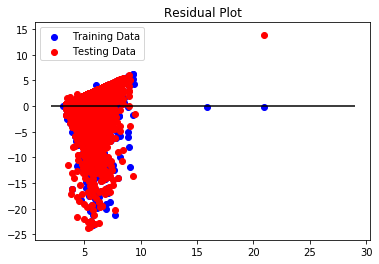

In [18]:
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test, c="red", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()

In [19]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

ValueError: If using all scalar values, you must pass an index